In [15]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import pickle 
import numpy as np 
from nn_helper import *

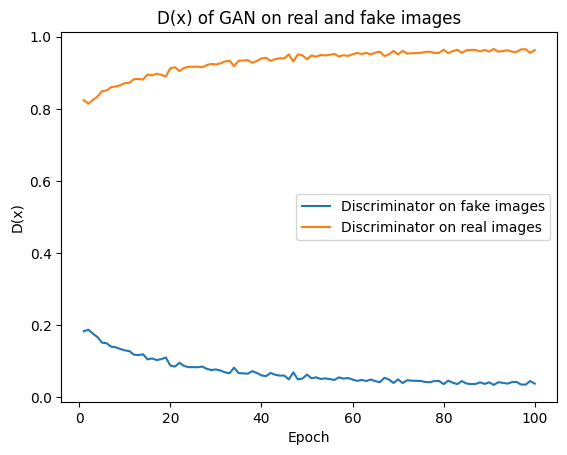

In [9]:
# Plot discriminator results for real and fake data for GAN 
with open('saved_losses/gan_dis_fake_arr.pkl', 'rb') as f:
    gan_dis_fake_arr = pickle.load(f)
with open('saved_losses/gan_dis_real_arr.pkl', 'rb') as f:
    gan_dis_real_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
gan_dis_fake_arr = np.array(gan_dis_fake_arr)
gan_dis_real_arr = np.array(gan_dis_real_arr)

plt.plot(epochs, gan_dis_fake_arr, label = "Discriminator on fake images")
plt.plot(epochs, gan_dis_real_arr, label = "Discriminator on real images")
plt.title("D(x) of GAN on real and fake images")
plt.xlabel("Epoch")
plt.ylabel("D(x)")
plt.legend()

plt.savefig("plots/discriminator_gan.png", bbox_inches = 'tight')

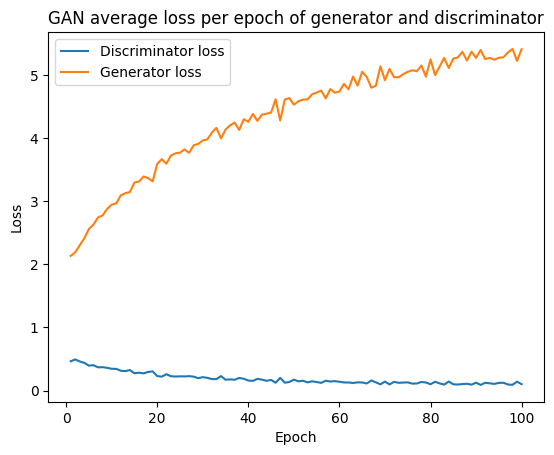

In [10]:
# Plot loss of discriminator and generator for GAN 
with open('saved_losses/gan_dis_loss_arr.pkl', 'rb') as f:
    gan_dis_fake_arr = pickle.load(f)
with open('saved_losses/gan_gen_loss_arr.pkl', 'rb') as f:
    gan_gen_loss_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
gan_dis_fake_arr = np.array(gan_dis_fake_arr)
gan_gen_loss_arr = np.array(gan_gen_loss_arr)

plt.plot(epochs, gan_dis_fake_arr, label = "Discriminator loss")
plt.plot(epochs, gan_gen_loss_arr, label = "Generator loss")
plt.title("GAN average loss per epoch of generator and discriminator")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.savefig("plots/losses_gan.png", bbox_inches = 'tight')

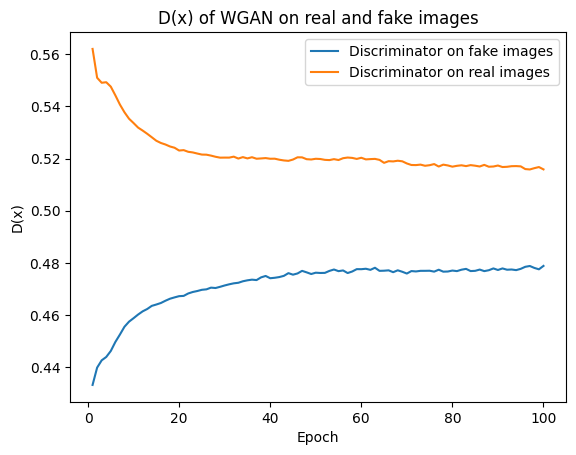

In [11]:
# Plot discriminator results for real and fake data for WGAN 
with open('saved_losses/wgan_dis_fake_arr.pkl', 'rb') as f:
    wgan_dis_fake_arr = pickle.load(f)
with open('saved_losses/wgan_dis_real_arr.pkl', 'rb') as f:
    wgan_dis_real_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
wgan_dis_fake_arr = np.array(wgan_dis_fake_arr)
wgan_dis_real_arr = np.array(wgan_dis_real_arr)

plt.plot(epochs, wgan_dis_fake_arr, label = "Discriminator on fake images")
plt.plot(epochs, wgan_dis_real_arr, label = "Discriminator on real images")
plt.title("D(x) of WGAN on real and fake images")
plt.xlabel("Epoch")
plt.ylabel("D(x)")
plt.legend()

plt.savefig("plots/discriminator_wgan.png", bbox_inches = 'tight')

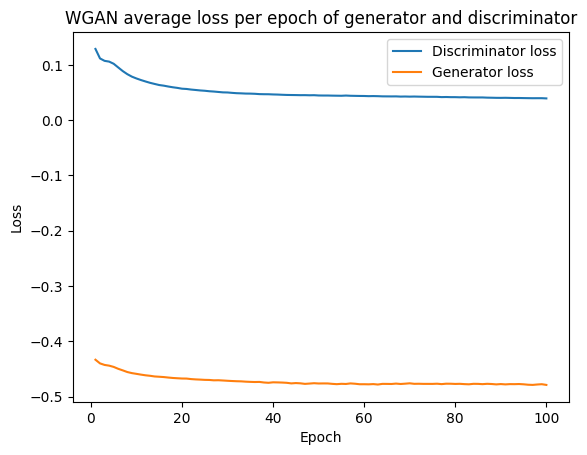

In [12]:
# Plot loss of discriminator and generator for WGAN 
with open('saved_losses/wgan_dis_loss_arr.pkl', 'rb') as f:
    wgan_dis_fake_arr = pickle.load(f)
with open('saved_losses/wgan_gen_loss_arr.pkl', 'rb') as f:
    wgan_gen_loss_arr = pickle.load(f)
epochs = np.arange(0.0, 100.0) + 1.0
wgan_dis_fake_arr = -1.0 * np.array(wgan_dis_fake_arr)
wgan_gen_loss_arr = np.array(wgan_gen_loss_arr)

plt.plot(epochs, wgan_dis_fake_arr, label = "Discriminator loss")
plt.plot(epochs, wgan_gen_loss_arr, label = "Generator loss")
plt.title("WGAN average loss per epoch of generator and discriminator")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.savefig("plots/losses_wgan.png", bbox_inches = 'tight')

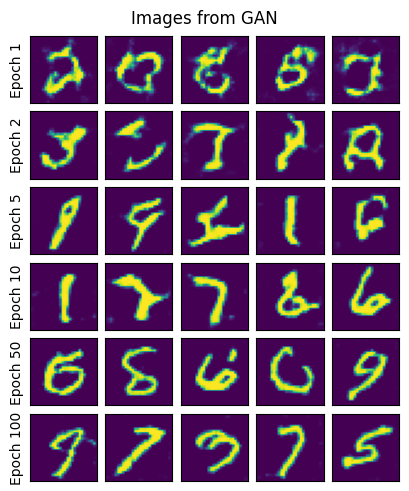

In [13]:
# Set seed for reproducible results 
torch.manual_seed(42)

# Plot images generated by GAN 
f, axes = plt.subplots(6,5, layout="compressed")

num_epochs = [1, 2, 5, 10, 50, 100]
for idx, epoch in enumerate(num_epochs):
    for num_image in range(5):
        generator = Generator(100, 128)
        generator.load_state_dict(torch.load("GAN_params/gen-params-" + str(epoch)))

        noise = create_noise(1, 100)
        image = generator(noise).squeeze().detach().numpy()
        image = (image * 0.5) + 0.5
        axes[idx, num_image].imshow(image)
        axes[idx, num_image].set_xticks([])
        axes[idx, num_image].set_yticks([])
        if num_image == 0:
            axes[idx, num_image].set_ylabel("Epoch " + str(epoch))
plt.suptitle("Images from GAN")
plt.savefig("plots/images_GAN.png", bbox_inches = 'tight')
plt.show()

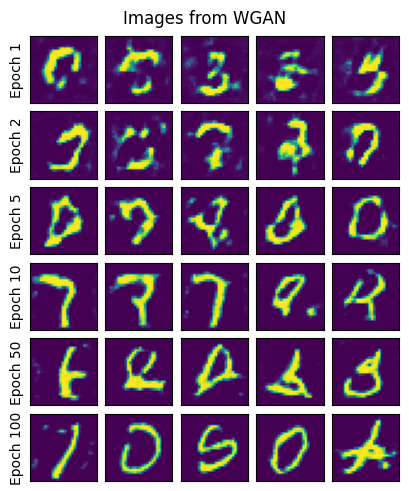

In [14]:
torch.manual_seed(42)

# Plot images generated by WGAN 
f, axes = plt.subplots(6,5, layout="compressed")

num_epochs = [1, 2, 5, 10, 50, 100]
for idx, epoch in enumerate(num_epochs):
    for num_image in range(5):
        generator = Generator(100, 128)
        generator.load_state_dict(torch.load("WGAN_params/gen-params-" + str(epoch)))

        noise = create_noise(1, 100)
        image = generator(noise).squeeze().detach().numpy()
        image = (image * 0.5) + 0.5
        axes[idx, num_image].imshow(image)
        axes[idx, num_image].set_xticks([])
        axes[idx, num_image].set_yticks([])
        if num_image == 0:
            axes[idx, num_image].set_ylabel("Epoch " + str(epoch))
plt.suptitle("Images from WGAN")
plt.savefig("plots/images_WGAN.png", bbox_inches = 'tight')
plt.show()